In [3]:
import requests
import pandas as pd
import io
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch data from URL
response = requests.get(URL)

# Read data into a DataFrame
df = pd.read_csv(io.StringIO(response.text))

# Now you can work with the DataFrame 'df'


In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


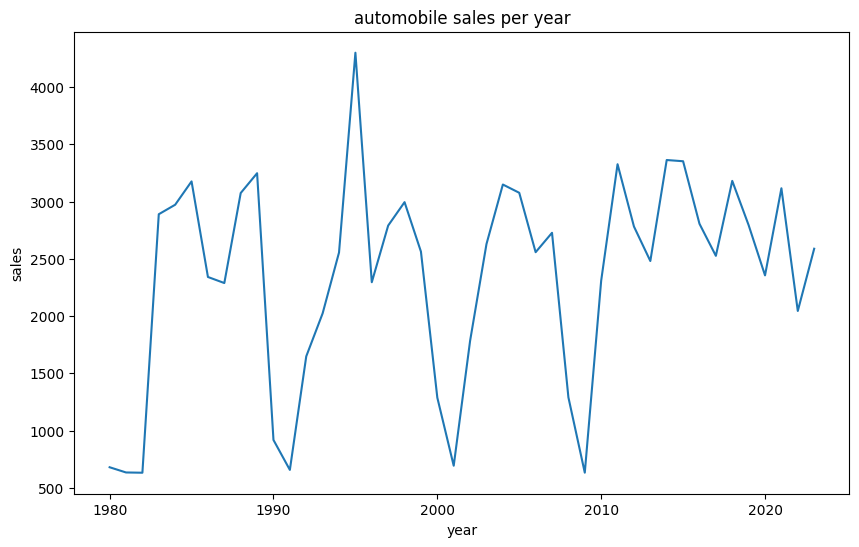

In [5]:
#create data for plotting

import matplotlib.pyplot as plt
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('automobile sales per year')
plt.show()

# Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession
annotation for at least two years of recession
Title as Automobile Sales during Recession

<Figure size 1000x600 with 0 Axes>

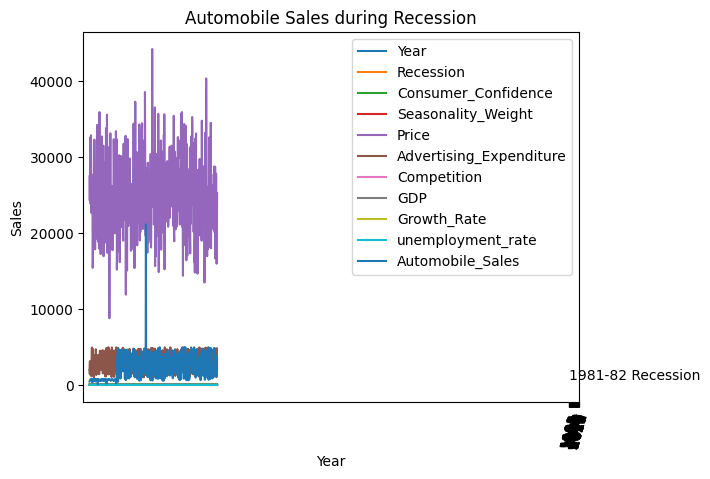

In [10]:
plt.figure(figsize=(10, 6))
df_line = df
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.show()



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


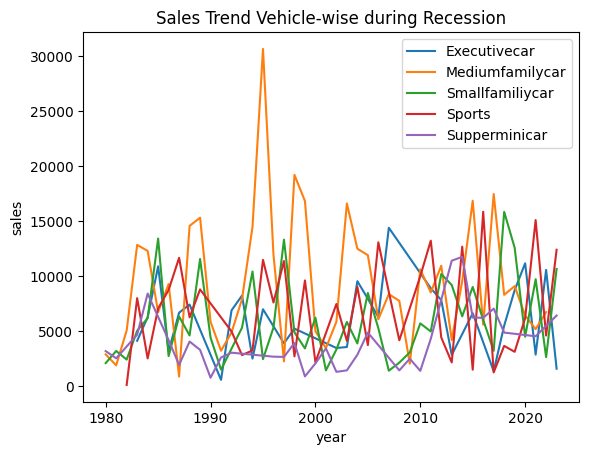

In [12]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

###  TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

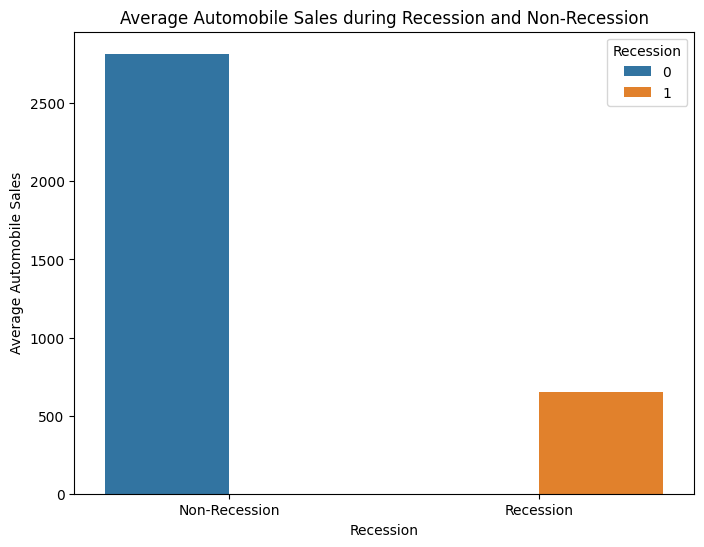

In [17]:
import seaborn as sns
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
# Convert 'Recession' column to string
new_df['Recession'] = new_df['Recession'].astype(str)

# Create the bar chart using seaborn
plt.figure(figsize=(8, 6))  # You can fill in the desired width and height of the figure
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')  # You can fill in the label for the x-axis
plt.ylabel('Average Automobile Sales')  # You can fill in the label for the y-axis
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

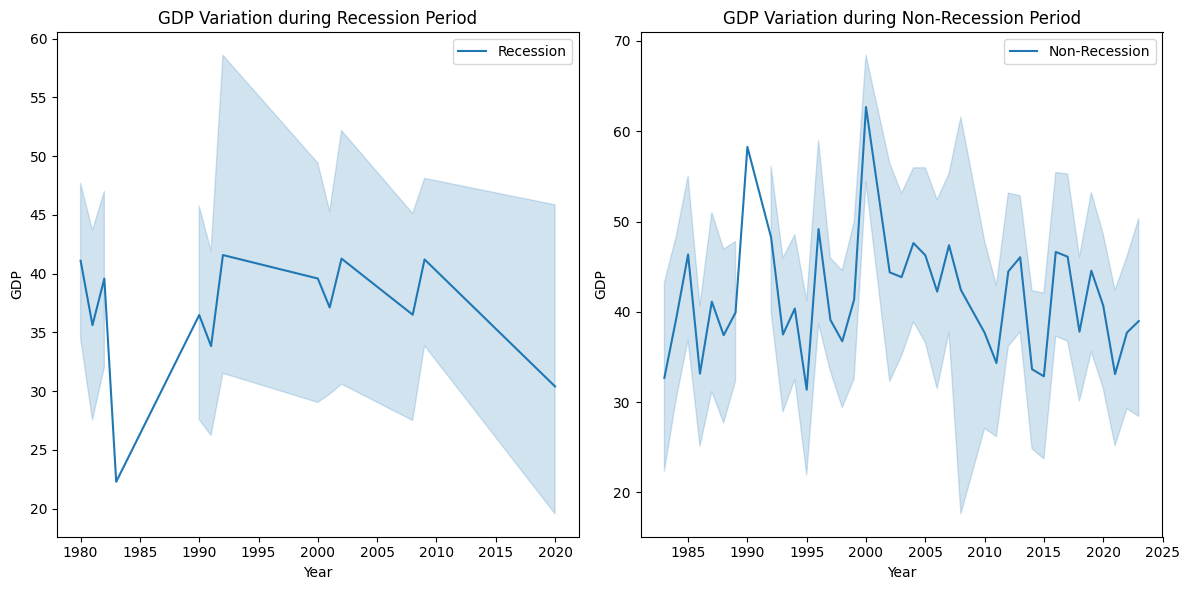

In [18]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig=plt.figure(figsize=(12, 6))

# Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

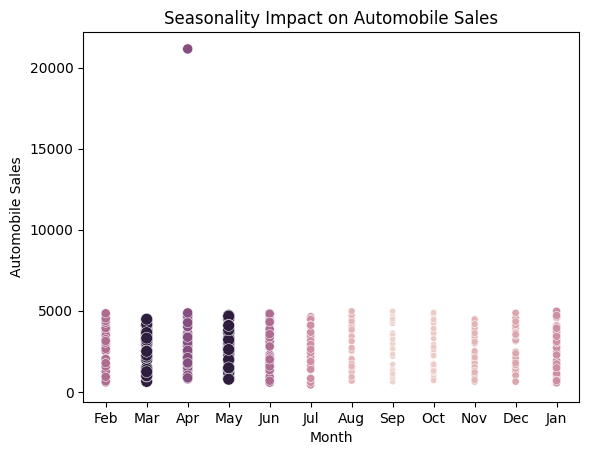

In [19]:
non_rec_data = df[df['Recession'] == 0]

size = non_rec_data['Seasonality_Weight']  # for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


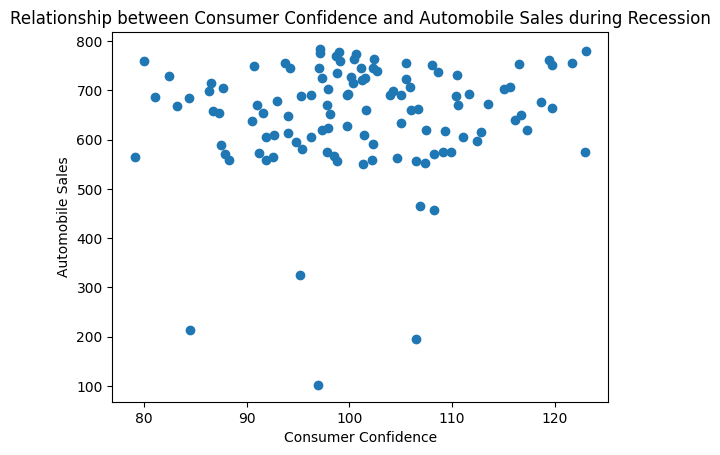

In [20]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Consumer Confidence and Automobile Sales during Recession')

plt.show()


### TASK 1.7: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


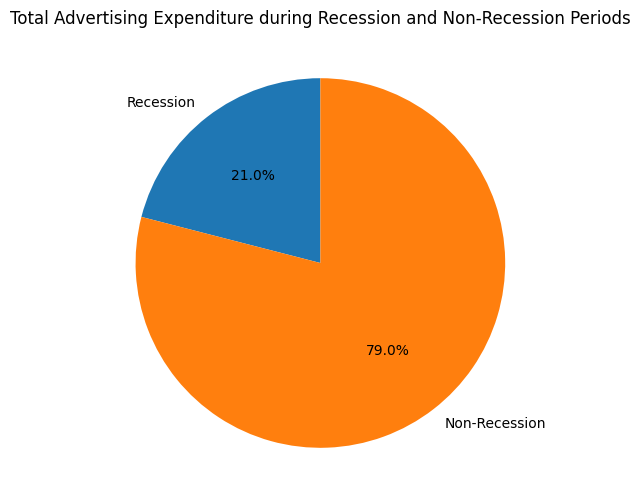

In [23]:
# Filter the data for recession and non-recession periods
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()


 ### TASK 1.8: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


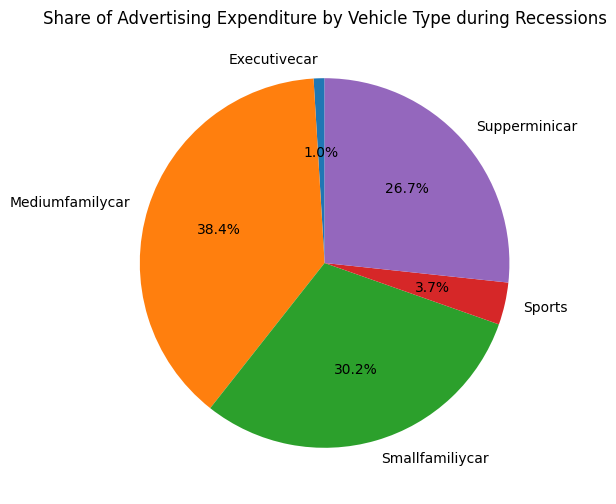

In [24]:
# Filter the data for recessions
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Advertising Expenditure by Vehicle Type during Recessions')

plt.show()


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

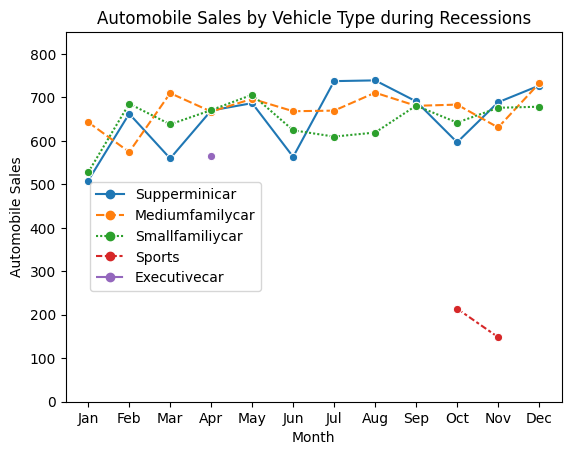

In [25]:
df_rec = df[df['Recession'] == 1]
sns.lineplot(data=df_rec, x='Month', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0, 850)  # Set y-axis limit
plt.legend(loc=(0.05, 0.3))  # Adjust legend position
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales by Vehicle Type during Recessions')
plt.show()
